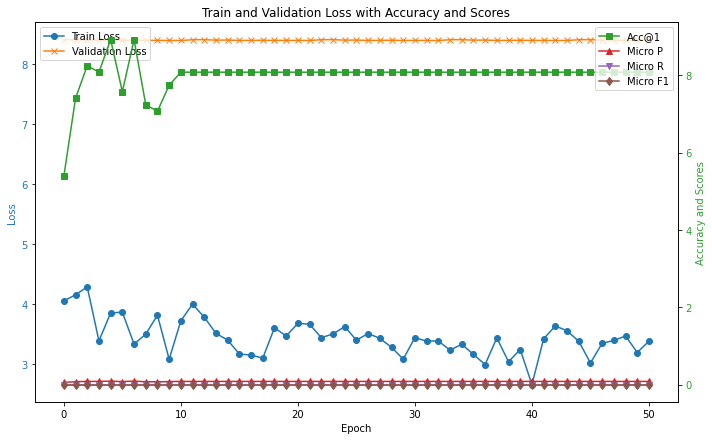

In [7]:
import re
import matplotlib.pyplot as plt

def extract_metrics_from_log(log_file):
    epochs = []
    tot_loss = []
    val_loss = []
    acc1 = []
    micro_p = []
    micro_r = []
    micro_f1 = []
    
    with open(log_file, 'r') as file:
        lines = file.readlines()
    
    for line in lines:
        # Extracting total loss during training
        match_train_loss = re.search(r"tot_loss ([0-9\.]+)", line)
        if match_train_loss:
            tot_loss.append(float(match_train_loss.group(1)))

        # Extracting validation metrics
        match_val_loss = re.search(r"Validation Loss: ([0-9\.]+)", line)
        if match_val_loss:
            val_loss.append(float(match_val_loss.group(1)))
        
        match_acc1 = re.search(r"Acc@1: ([0-9\.]+)", line)
        if match_acc1:
            acc1.append(float(match_acc1.group(1)))
        
        match_micro_p = re.search(r"Micro P: ([0-9\.]+)", line)
        if match_micro_p:
            micro_p.append(float(match_micro_p.group(1)))
        
        match_micro_r = re.search(r"Micro R: ([0-9\.]+)", line)
        if match_micro_r:
            micro_r.append(float(match_micro_r.group(1)))
        
        match_micro_f1 = re.search(r"Micro F1: ([0-9\.]+)", line)
        if match_micro_f1:
            micro_f1.append(float(match_micro_f1.group(1)))
        
        # Extracting epoch numbers
        match_epoch = re.search(r"EPOCH (\d+)", line)
        if match_epoch:
            epochs.append(int(match_epoch.group(1)))
    
    return epochs, tot_loss, val_loss, acc1, micro_p, micro_r, micro_f1

def plot_metrics(epochs, tot_loss, val_loss, acc1, micro_p, micro_r, micro_f1):
    # Ensure the length of epochs and val_loss match
    if len(val_loss) == 1:
        val_loss_repeated = val_loss * len(epochs)
    elif len(val_loss) != len(epochs):
        # Interpolate or repeat the validation loss to match the number of epochs
        if len(val_loss) < len(epochs):
            # Repeat the validation loss values (simplest method)
            val_loss_repeated = val_loss * (len(epochs) // len(val_loss)) + val_loss[:len(epochs) % len(val_loss)]
        else:
            # Truncate the validation loss if there are more val_loss entries
            val_loss_repeated = val_loss[:len(epochs)]
    else:
        val_loss_repeated = val_loss

    # Ensure that other metrics match the length of epochs
    def match_length(metrics, epochs_len):
        if len(metrics) == 0:
            return [0] * epochs_len  # If metrics are empty, return a list of zeros
        if len(metrics) < epochs_len:
            return metrics + [metrics[-1]] * (epochs_len - len(metrics))
        else:
            return metrics[:epochs_len]

    acc1 = match_length(acc1, len(epochs))
    micro_p = match_length(micro_p, len(epochs))
    micro_r = match_length(micro_r, len(epochs))
    micro_f1 = match_length(micro_f1, len(epochs))
    
    # Plotting
    fig, ax1 = plt.subplots(figsize=(10, 6))

    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss', color='tab:blue')
    ax1.plot(epochs, tot_loss[:len(epochs)], label='Train Loss', color='tab:blue', marker='o')
    ax1.plot(epochs, val_loss_repeated, label='Validation Loss', color='tab:orange', marker='x')
    ax1.tick_params(axis='y', labelcolor='tab:blue')

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
    ax2.set_ylabel('Accuracy and Scores', color='tab:green')
    ax2.plot(epochs, acc1, label='Acc@1', color='tab:green', marker='s')
    ax2.plot(epochs, micro_p, label='Micro P', color='tab:red', marker='^')
    ax2.plot(epochs, micro_r, label='Micro R', color='tab:purple', marker='v')
    ax2.plot(epochs, micro_f1, label='Micro F1', color='tab:brown', marker='d')
    ax2.tick_params(axis='y', labelcolor='tab:green')

    fig.tight_layout()  # to ensure everything fits without overlap
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')

    plt.title('Train and Validation Loss with Accuracy and Scores')
    plt.show()


log_file = 'log_rank0.txt'  # Replace with the path to your log file
epochs, tot_loss, val_loss, acc1, micro_p, micro_r, micro_f1 = extract_metrics_from_log(log_file)
plot_metrics(epochs, tot_loss, val_loss, acc1, micro_p, micro_r, micro_f1)


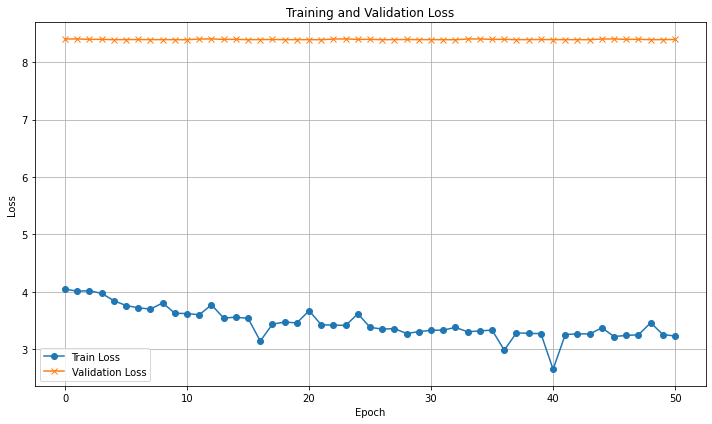

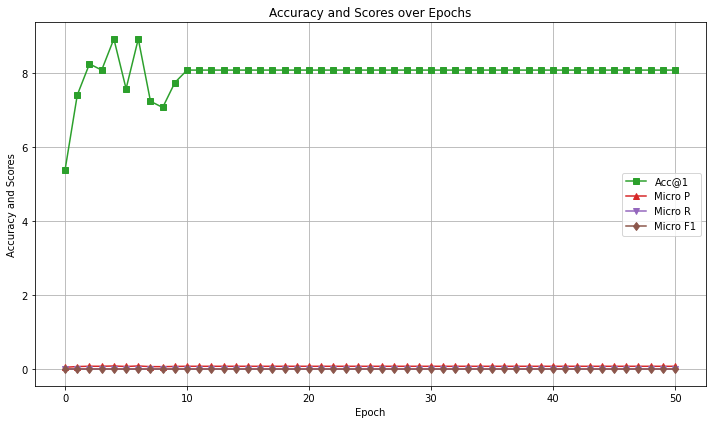

In [9]:
import re
import matplotlib.pyplot as plt

def extract_metrics_from_log(log_file):
    epochs = []
    tot_loss = []
    val_loss = []
    acc1 = []
    micro_p = []
    micro_r = []
    micro_f1 = []
    
    with open(log_file, 'r') as file:
        lines = file.readlines()
    
    for line in lines:
        # Extracting total loss during training (average value in parentheses)
        match_train_loss = re.search(r"tot_loss [0-9\.]+\s\(([0-9\.]+)\)", line)
        if match_train_loss:
            tot_loss.append(float(match_train_loss.group(1)))

        # Extracting validation metrics
        match_val_loss = re.search(r"Validation Loss: ([0-9\.]+)", line)
        if match_val_loss:
            val_loss.append(float(match_val_loss.group(1)))
        
        match_acc1 = re.search(r"Acc@1: ([0-9\.]+)", line)
        if match_acc1:
            acc1.append(float(match_acc1.group(1)))
        
        match_micro_p = re.search(r"Micro P: ([0-9\.]+)", line)
        if match_micro_p:
            micro_p.append(float(match_micro_p.group(1)))
        
        match_micro_r = re.search(r"Micro R: ([0-9\.]+)", line)
        if match_micro_r:
            micro_r.append(float(match_micro_r.group(1)))
        
        match_micro_f1 = re.search(r"Micro F1: ([0-9\.]+)", line)
        if match_micro_f1:
            micro_f1.append(float(match_micro_f1.group(1)))
        
        # Extracting epoch numbers
        match_epoch = re.search(r"EPOCH (\d+)", line)
        if match_epoch:
            epochs.append(int(match_epoch.group(1)))
    
    return epochs, tot_loss, val_loss, acc1, micro_p, micro_r, micro_f1

def plot_losses(epochs, tot_loss, val_loss):
    # Ensure the length of epochs and val_loss match
    if len(val_loss) == 1:
        val_loss_repeated = val_loss * len(epochs)
    elif len(val_loss) != len(epochs):
        # Interpolate or repeat the validation loss to match the number of epochs
        if len(val_loss) < len(epochs):
            # Repeat the validation loss values (simplest method)
            val_loss_repeated = val_loss * (len(epochs) // len(val_loss)) + val_loss[:len(epochs) % len(val_loss)]
        else:
            # Truncate the validation loss if there are more val_loss entries
            val_loss_repeated = val_loss[:len(epochs)]
    else:
        val_loss_repeated = val_loss

    # Plotting Losses
    plt.figure(figsize=(10, 6))
    plt.plot(epochs, tot_loss[:len(epochs)], label='Train Loss', color='tab:blue', marker='o')
    plt.plot(epochs, val_loss_repeated, label='Validation Loss', color='tab:orange', marker='x')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def plot_metrics(epochs, acc1, micro_p, micro_r, micro_f1):
    # Ensure that other metrics match the length of epochs
    def match_length(metrics, epochs_len):
        if len(metrics) == 0:
            return [0] * epochs_len  # If metrics are empty, return a list of zeros
        if len(metrics) < epochs_len:
            return metrics + [metrics[-1]] * (epochs_len - len(metrics))
        else:
            return metrics[:epochs_len]

    acc1 = match_length(acc1, len(epochs))
    micro_p = match_length(micro_p, len(epochs))
    micro_r = match_length(micro_r, len(epochs))
    micro_f1 = match_length(micro_f1, len(epochs))
    
    # Plotting Metrics
    plt.figure(figsize=(10, 6))
    plt.plot(epochs, acc1, label='Acc@1', color='tab:green', marker='s')
    plt.plot(epochs, micro_p, label='Micro P', color='tab:red', marker='^')
    plt.plot(epochs, micro_r, label='Micro R', color='tab:purple', marker='v')
    plt.plot(epochs, micro_f1, label='Micro F1', color='tab:brown', marker='d')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy and Scores')
    plt.title('Accuracy and Scores over Epochs')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


log_file = 'log_rank0.txt'  # Replace with the path to your log file
epochs, tot_loss, val_loss, acc1, micro_p, micro_r, micro_f1 = extract_metrics_from_log(log_file)

# Plot losses separately
plot_losses(epochs, tot_loss, val_loss)

# Plot metrics separately
plot_metrics(epochs, acc1, micro_p, micro_r, micro_f1)
